In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('ai4i2020copy.csv')

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3
2,3,L47182,L,298.1,308.5,1498,49.4,5
3,4,L47183,L,298.2,308.6,1433,39.5,7
4,5,L47184,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14
9996,9997,H39410,H,298.9,308.4,1632,31.8,17
9997,9998,M24857,M,299.0,308.6,1645,33.4,22
9998,9999,H39412,H,299.0,308.7,1408,48.5,25


In [4]:
print(data.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]'],
      dtype='object')


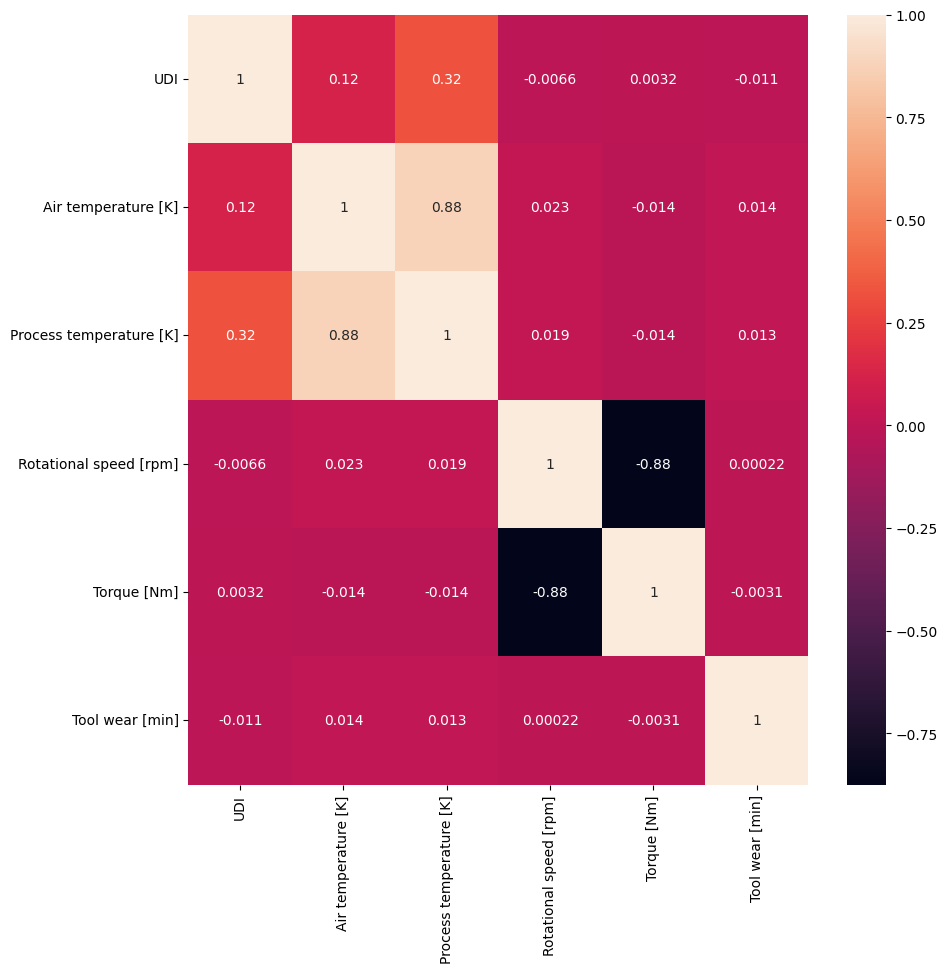

In [5]:
# create correlation matrix from the data, excluding non-numerical columns
corr_matrix = data.select_dtypes(include=['number']).corr()

# visualize the correlation matrix using seaborn with dpecified fig size
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3
2,3,L47182,L,298.1,308.5,1498,49.4,5
3,4,L47183,L,298.2,308.6,1433,39.5,7
4,5,L47184,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14
9996,9997,H39410,H,298.9,308.4,1632,31.8,17
9997,9998,M24857,M,299.0,308.6,1645,33.4,22
9998,9999,H39412,H,299.0,308.7,1408,48.5,25


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik yang lebih baik
sns.set(style="whitegrid")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


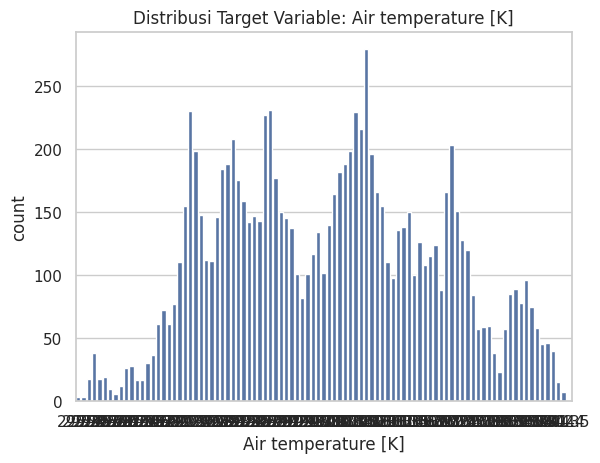

In [8]:
# Informasi umum tentang data
data.info()

# Statistik deskriptif
data.describe()

# Distribusi target variable 'Air temperature [K]'
sns.countplot(x='Air temperature [K]', data=data)
plt.title('Distribusi Target Variable: Air temperature [K]')
plt.show()

In [9]:
# Memeriksa dan menangani nilai yang hilang
data.isnull().sum()

# Mengkodekan variabel kategorikal jika ada (dalam contoh ini tidak ada variabel kategorikal)

# Memisahkan fitur dan target
X = data.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]'], axis=1)
y = data['Air temperature [K]']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Membuat dan melatih model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred = model.predict(X_test)

Random Forest Regressor
Mean Squared Error: 0.97
R^2 Score: 0.75


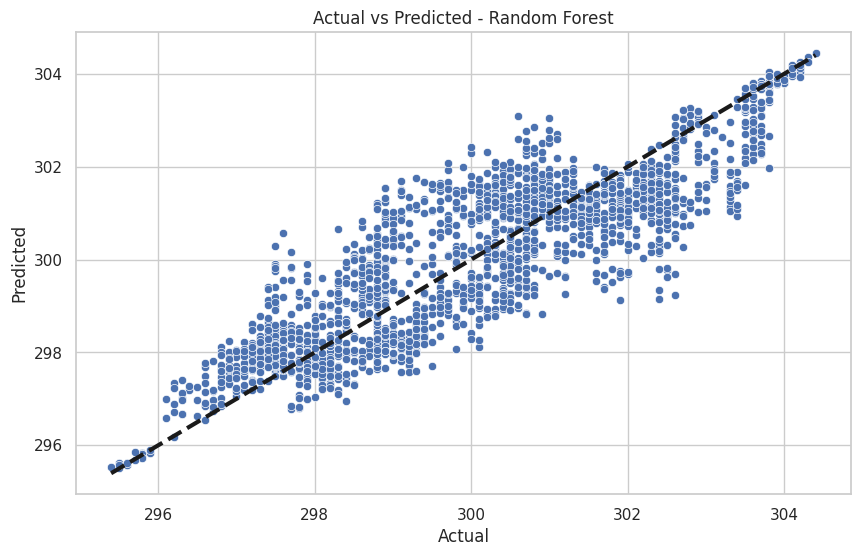

In [11]:
# Sesuaikan kolom yang dibutuhkan
X = data.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]'], axis=1)
y = data['Air temperature [K]']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Membuat dan melatih model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred_rf = rf_model.predict(X_test)

# Menampilkan metrik evaluasi
# Import necessary metrics if not already imported
from sklearn.metrics import mean_squared_error, r2_score
print("Random Forest Regressor")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred_rf):.2f}')

# Plot scatter plot untuk prediksi vs aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Random Forest')
plt.show()

In [12]:
target = data["UDI"].to_numpy()
feature = data[["Rotational speed [rpm]", "Torque [Nm]", "UDI"]].copy().drop(["UDI"], axis=1).to_numpy()

In [13]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=1234)

In [14]:
logistic_regressor = LogisticRegression(solver='liblinear',max_iter=200)
logistic_regressor.fit(feature_train, target_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [15]:
test_pred = logistic_regressor.predict(feature_test)

In [19]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Misalkan y_test dan y_pred adalah array yang berisi label sebenarnya dan prediksi
# Berikut contoh konversi ke nilai integer jika diperlukan
y_test = np.array([0, 1, 2, 2, 1, 0])
y_pred = np.array([0, 2, 2, 2, 1, 0])

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Menampilkan akurasi
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6

Accuracy: 0.83


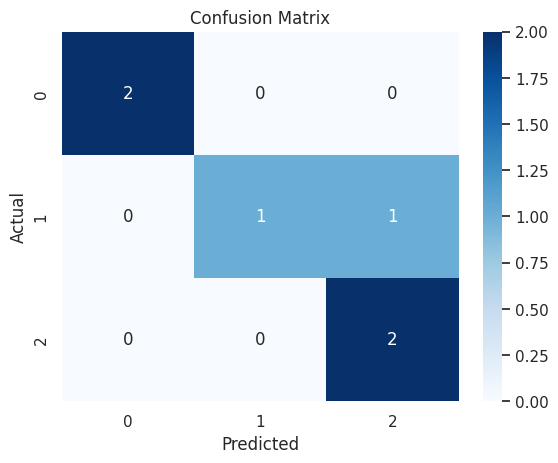

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

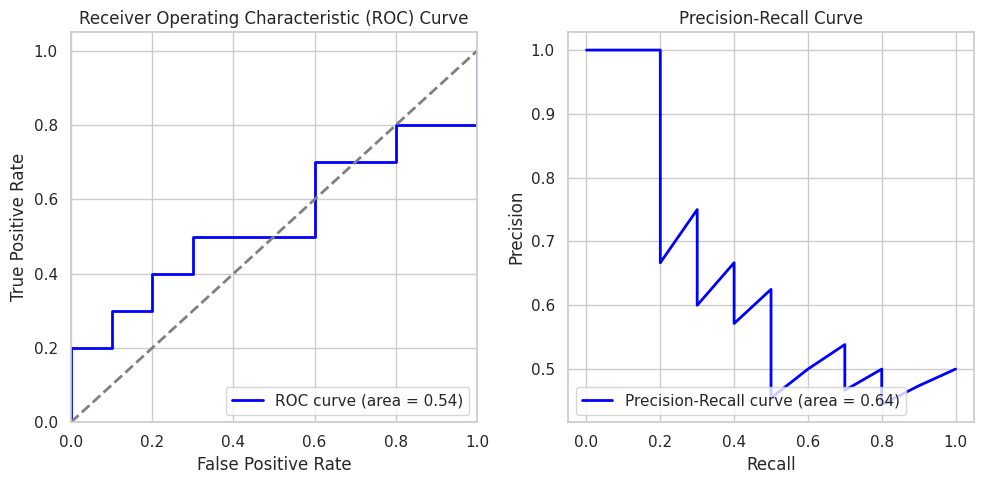

Logistic Regression
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Accuracy: 0.55


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve

# Contoh data (pastikan y_train dan y_test adalah nilai diskrit)
# X_train, X_test, y_train, y_test harus didefinisikan sebelumnya
# Berikut contoh dummy data untuk ilustrasi
X_train = np.random.rand(100, 10)
X_test = np.random.rand(20, 10)
y_train = np.random.randint(2, size=100)
y_test = np.random.randint(2, size=20)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Menampilkan laporan klasifikasi
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy    = 0.5
Sensitivity = 0.364
Specificity = 0.667
Precision   = 0.571


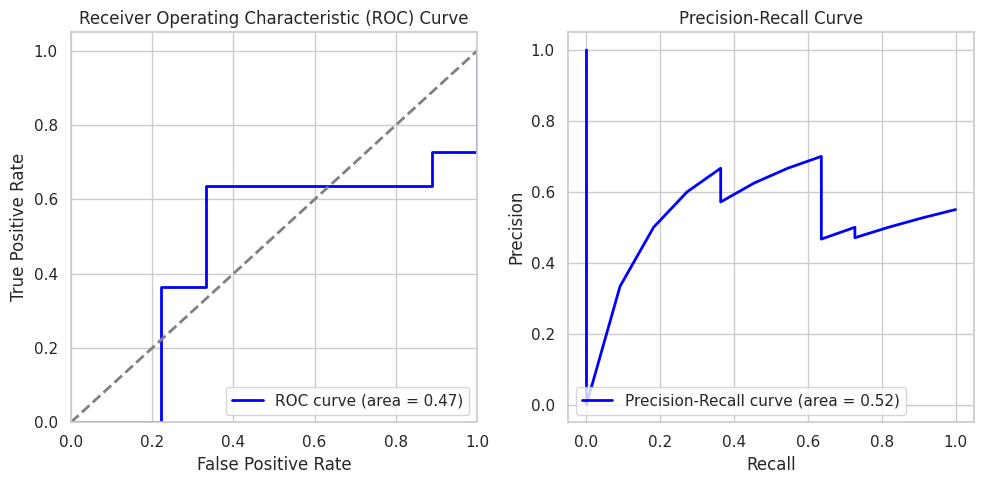

Logistic Regression
              precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.57      0.36      0.44        11

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.52      0.50      0.49        20

Accuracy: 0.50


In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Contoh data (pastikan y_train dan y_test adalah nilai diskrit)
# X_train, X_test, y_train, y_test harus didefinisikan sebelumnya
# Berikut contoh dummy data untuk ilustrasi
X_train = np.random.rand(100, 10)
X_test = np.random.rand(20, 10)
y_train = np.random.randint(2, size=100)
y_test = np.random.randint(2, size=20)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Menghitung matriks kebingungan
conf_mat = confusion_matrix(y_test, y_pred)

# Menghitung metrik
accuracy = (conf_mat[0,0] + conf_mat[1,1]) / np.sum(conf_mat)
sensitivity = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])
specificity = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
precision = conf_mat[1,1] / (conf_mat[0,1] + conf_mat[1,1])

# Menampilkan metrik
print('Accuracy    = {}'.format(np.round(accuracy, 3)))
print('Sensitivity = {}'.format(np.round(sensitivity, 3)))
print('Specificity = {}'.format(np.round(specificity, 3)))
print('Precision   = {}'.format(np.round(precision, 3)))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision_vals, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision_vals)

plt.subplot(1, 2, 2)
plt.plot(recall, precision_vals, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Menampilkan laporan klasifikasi
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

